### Data Loading and Initial Inspection

** This section focuses on loading the diabetes prediction dataset and performing an initial inspection to understand its structure, size, and basic statistical properties. Preliminary data exploration is a critical step in the machine learning pipeline, as it provides insights into the nature of the variables, data types, potential data quality issues, and the overall suitability of the dataset for predictive modeling.

The dataset is imported using the Pandas library, while supporting libraries such as NumPy, Matplotlib, Seaborn, and SciPy are initialized for subsequent analysis, visualization, and statistical exploration. Display settings are configured to ensure complete visibility of dataset attributes during inspection.**


In [28]:
# Loading of Datasets and Initial Inspection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the dataset
import pandas as pd

thankgod_israel = pd.read_csv(
    r'C:\Users\User\Desktop\OSIRI UNIVERSITY Files\diabetes_prediction_dashboard\diabetes_prediction_dataset.csv'
)

# Display basic information
print("Dataset Shape:", thankgod_israel.shape)
print("\nDataset Info:")
thankgod_israel.info()
print("\nFirst 5 Rows:")
print(thankgod_israel.head())
print("\nSummary Statistics:")
print(thankgod_israel.describe())

Dataset Shape: (100000, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

First 5 Rows:
   gender   age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  blood_glucose_level  diabetes
0  Female  80.0             0              1           never  25.19          6.6                  1

### Dataset Overview and Initial Findings

The dataset contains **100,000 records** and **9 features**, combining numerical and categorical variables relevant to diabetes prediction. No missing values are present, indicating good data quality and minimal preprocessing requirements.

The target variable, **`diabetes`**, is binary, defining the task as a **classification problem**. Key predictors include age, BMI, HbA1c level, blood glucose level, hypertension status, heart disease, gender, and smoking history.

Descriptive statistics show clinically meaningful variation across features, while the prevalence of non-diabetic cases suggests potential **class imbalance**, which will be addressed in subsequent modeling stages. Overall, the dataset is suitable for exploratory analysis, feature engineering, and comparative machine learning evaluation.


In [29]:
thankgod_israel.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [30]:
thankgod_israel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# Check for missing values
print("Missing Values per Column:")
print(thankgod_israel.isnull().sum())

# Check for duplicates
print(f"\nNumber of Duplicate Rows: {thankgod_israel.duplicated().sum()}")

# Check data types
print("\nData Types:")
print(thankgod_israel.dtypes)

# Check unique values for categorical variables
categorical_cols = ['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']
for col in categorical_cols:
    print(f"\n{col} unique values: {thankgod_israel[col].unique()}")
    print(f"Counts:\n{thankgod_israel[col].value_counts()}")

Missing Values per Column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Number of Duplicate Rows: 3854

Data Types:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

gender unique values: ['Female' 'Male' 'Other']
Counts:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

smoking_history unique values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Counts:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtyp

### Data Quality and Distribution Summary

All features contain **zero missing values**, confirming dataset completeness. A total of **3,854 duplicate records** were identified, which will be addressed during preprocessing to prevent bias and data leakage.

Feature data types are consistent with their definitions, comprising numerical, binary, and categorical variables suitable for encoding and scaling. The target variable, **`diabetes`**, exhibits notable **class imbalance**, with approximately **91.5% non-diabetic** and **8.5% diabetic** cases, highlighting the need for imbalance-handling techniques in subsequent modeling stages.


### Exploratory Data Visualization

The visualizations present the distribution of key numerical and categorical features to provide an initial understanding of data patterns and variability. Histograms illustrate the spread and skewness of continuous variables such as age, BMI, HbA1c level, and blood glucose level, which are clinically relevant predictors of diabetes.

Bar charts summarize categorical variables, including gender, smoking history, hypertension, heart disease, and diabetes status. These plots highlight demographic composition and confirm the presence of **class imbalance** in the target variable. Overall, the visual analysis informs feature engineering decisions and supports appropriate model selection in subsequent stages.


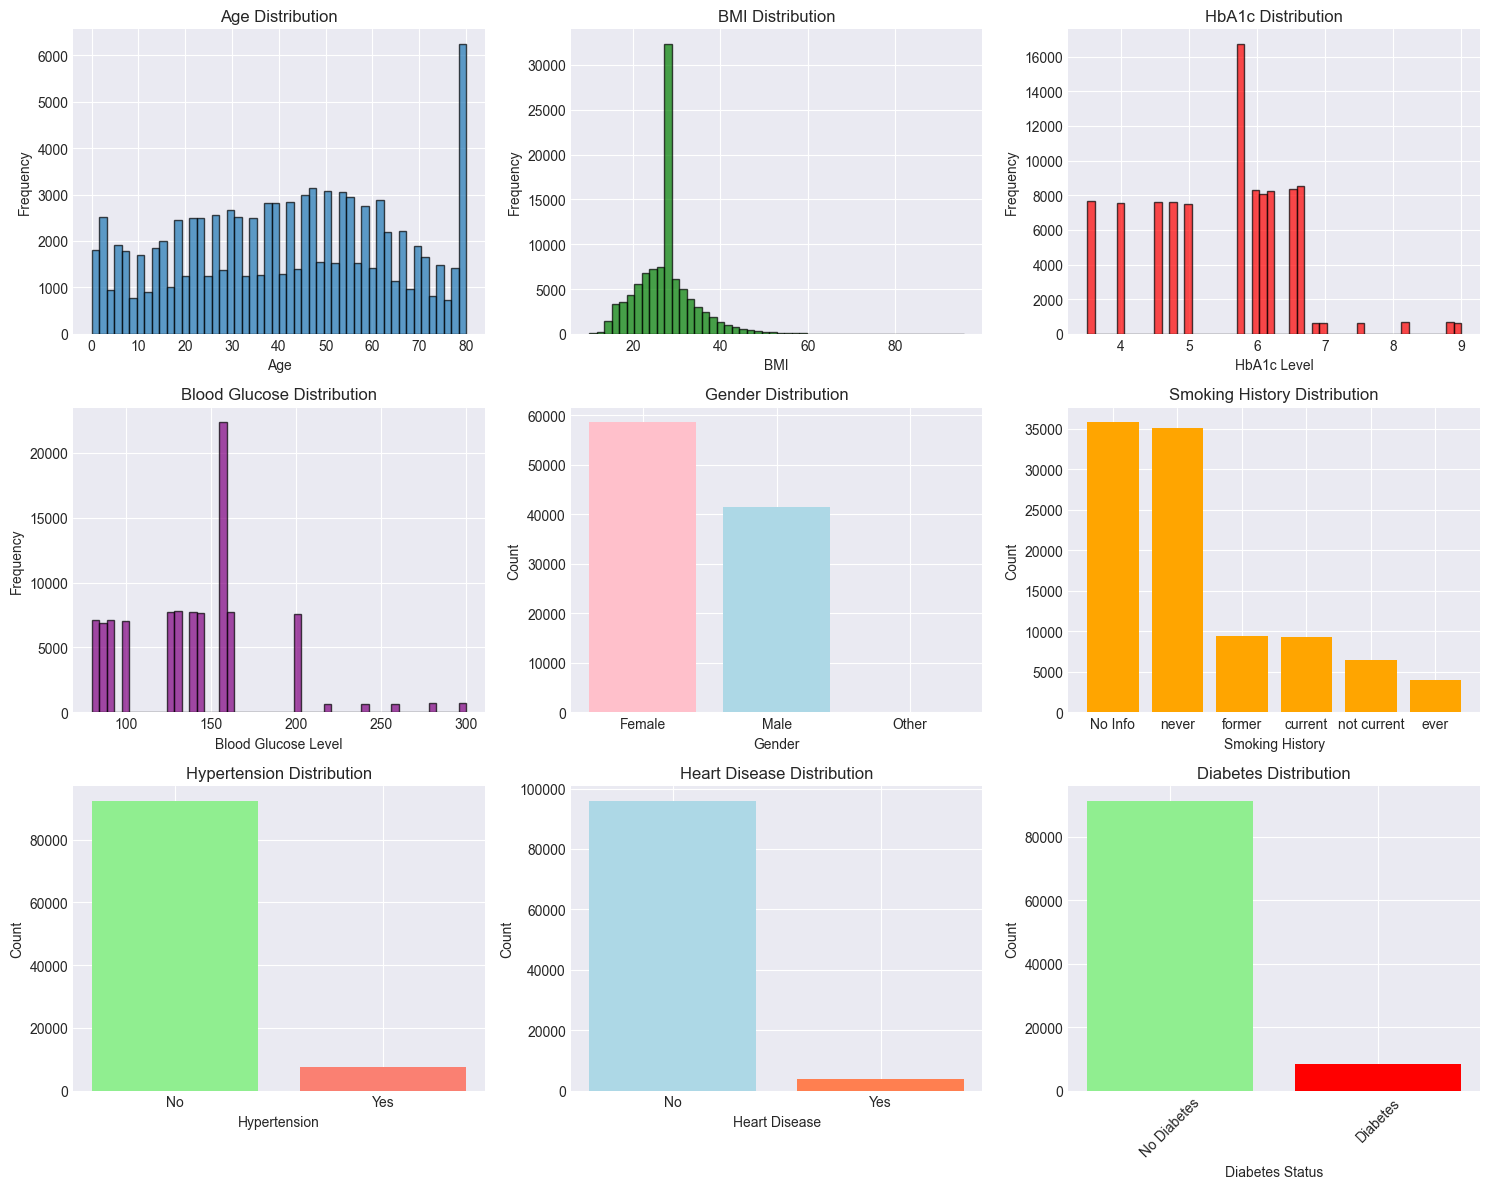

In [8]:
# Setting up visualization for various Views
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Distribution of age
axes[0, 0].hist(thankgod_israel['age'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Distribution of BMI
axes[0, 1].hist(thankgod_israel['bmi'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Distribution of HbA1c
axes[0, 2].hist(thankgod_israel['HbA1c_level'], bins=50, edgecolor='black', alpha=0.7, color='red')
axes[0, 2].set_title('HbA1c Distribution')
axes[0, 2].set_xlabel('HbA1c Level')
axes[0, 2].set_ylabel('Frequency')

# Distribution of blood glucose
axes[1, 0].hist(thankgod_israel['blood_glucose_level'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_title('Blood Glucose Distribution')
axes[1, 0].set_xlabel('Blood Glucose Level')
axes[1, 0].set_ylabel('Frequency')

# Gender distribution
gender_counts = thankgod_israel['gender'].value_counts()
axes[1, 1].bar(gender_counts.index, gender_counts.values, color=['pink', 'lightblue', 'gray'])
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

# Smoking history distribution
smoking_counts = thankgod_israel['smoking_history'].value_counts()
axes[1, 2].bar(range(len(smoking_counts)), smoking_counts.values,
               tick_label=smoking_counts.index, color='orange')
axes[1, 2].set_title('Smoking History Distribution')
axes[1, 2].set_xlabel('Smoking History')
axes[1, 2].set_ylabel('Count')
plt.xticks(rotation=45)

# Hypertension distribution
hypertension_counts = thankgod_israel['hypertension'].value_counts()
axes[2, 0].bar(['No', 'Yes'], hypertension_counts.values, color=['lightgreen', 'salmon'])
axes[2, 0].set_title('Hypertension Distribution')
axes[2, 0].set_xlabel('Hypertension')
axes[2, 0].set_ylabel('Count')

# Heart disease distribution
heart_disease_counts = thankgod_israel['heart_disease'].value_counts()
axes[2, 1].bar(['No', 'Yes'], heart_disease_counts.values, color=['lightblue', 'coral'])
axes[2, 1].set_title('Heart Disease Distribution')
axes[2, 1].set_xlabel('Heart Disease')
axes[2, 1].set_ylabel('Count')

# Diabetes distribution
diabetes_counts = thankgod_israel['diabetes'].value_counts()
axes[2, 2].bar(['No Diabetes', 'Diabetes'], diabetes_counts.values, color=['lightgreen', 'red'])
axes[2, 2].set_title('Diabetes Distribution')
axes[2, 2].set_xlabel('Diabetes Status')
axes[2, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Feature Relationship and Target Association Analysis

This section examines relationships among numerical variables and their association with diabetes status. Correlation analysis and comparative visualizations are used to identify influential predictors and potential multicollinearity.


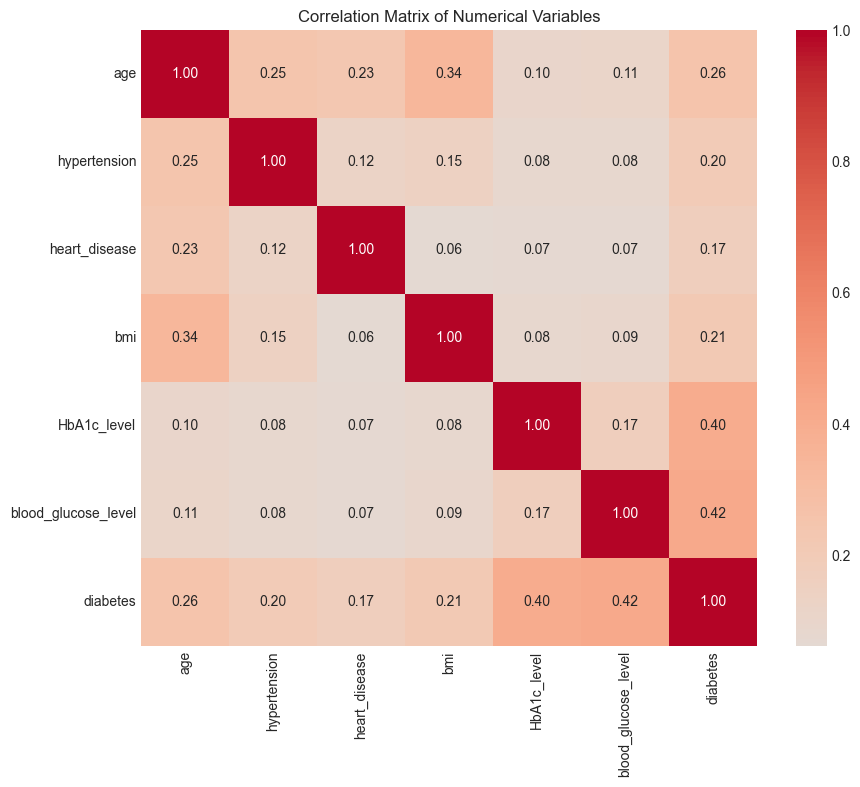

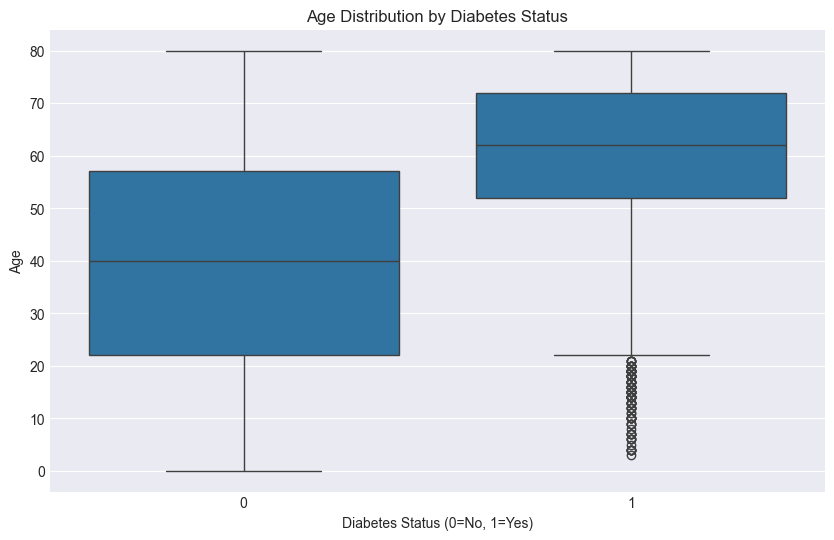

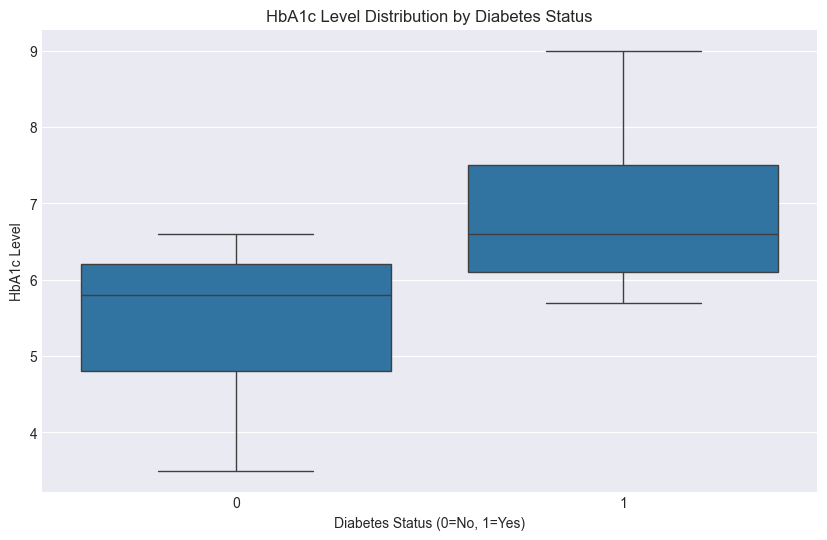

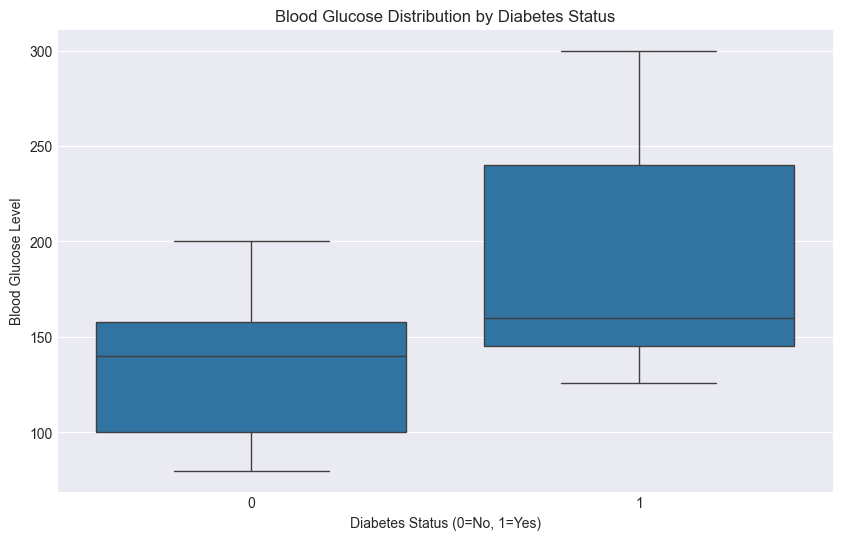

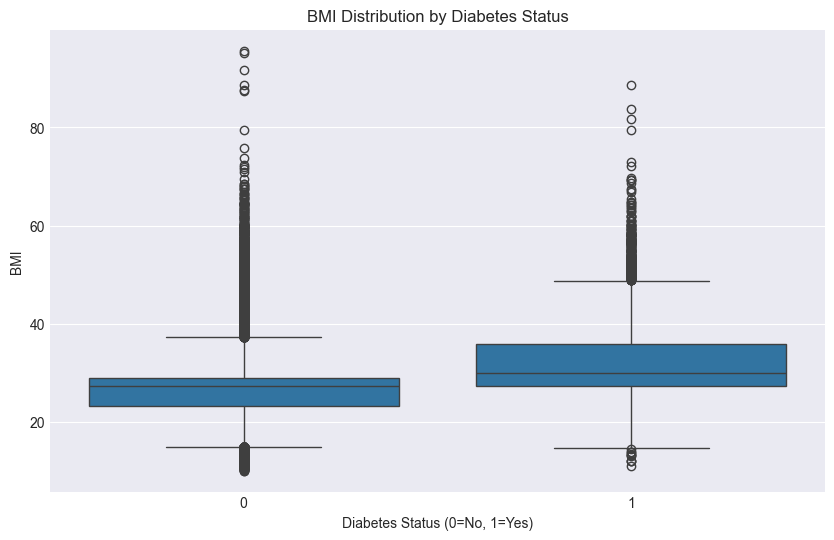

In [9]:
# Correlation matrix
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi',
                  'HbA1c_level', 'blood_glucose_level', 'diabetes']
correlation_matrix = thankgod_israel[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Age vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='age', data=thankgod_israel)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

# HbA1c vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=thankgod_israel)
plt.title('HbA1c Level Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('HbA1c Level')
plt.show()

# Blood Glucose vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=thankgod_israel)
plt.title('Blood Glucose Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('Blood Glucose Level')
plt.show()

# BMI vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='bmi', data=thankgod_israel)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

### Key Observations

The correlation matrix highlights the strength and direction of linear relationships among numerical features. Clinical variables such as **HbA1c level** and **blood glucose level** show stronger positive associations with diabetes compared to demographic features.

Boxplot analyses reveal clear distributional differences between diabetic and non-diabetic groups across age, BMI, HbA1c level, and blood glucose level. These separations indicate strong predictive potential and support their inclusion as key features in subsequent machine learning models.


### Multivariate Relationship Exploration

This section explores multivariate relationships among key predictors and the target variable using scatter plot matrices and pairwise visualizations. These techniques help reveal interaction patterns, non-linear relationships, and class separation characteristics.


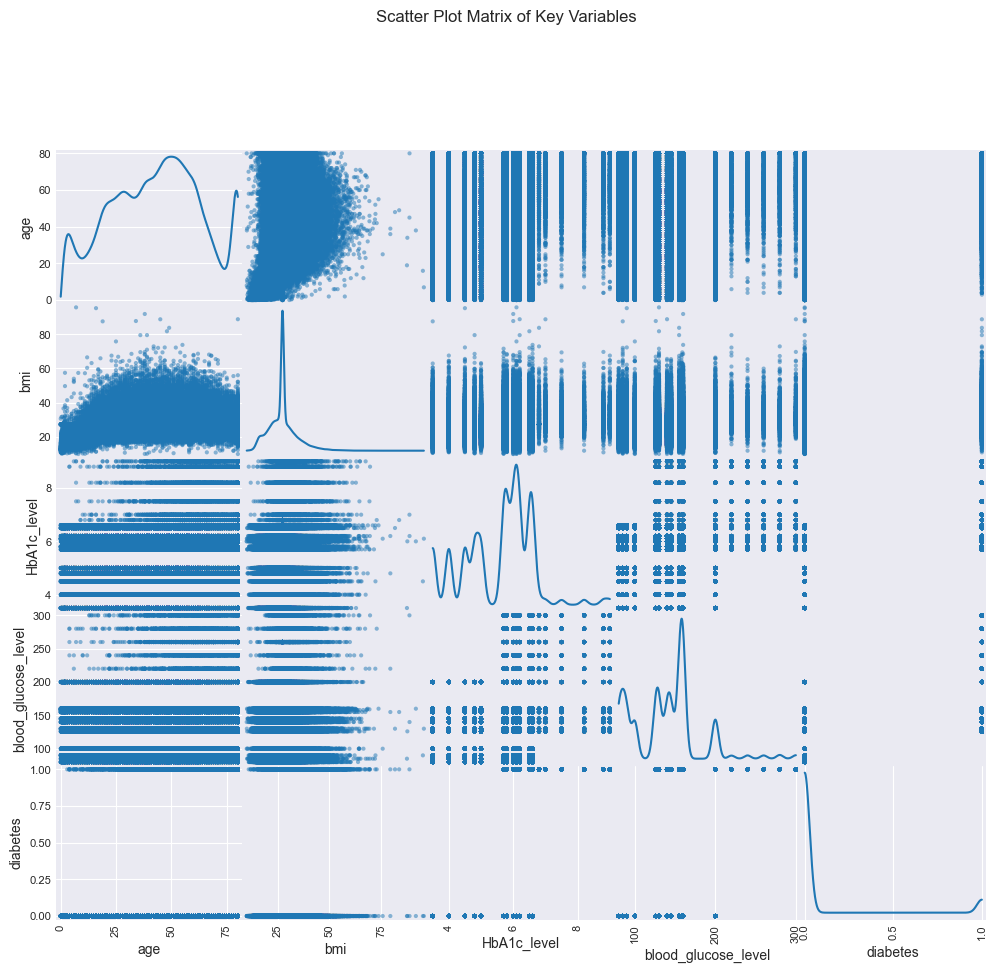

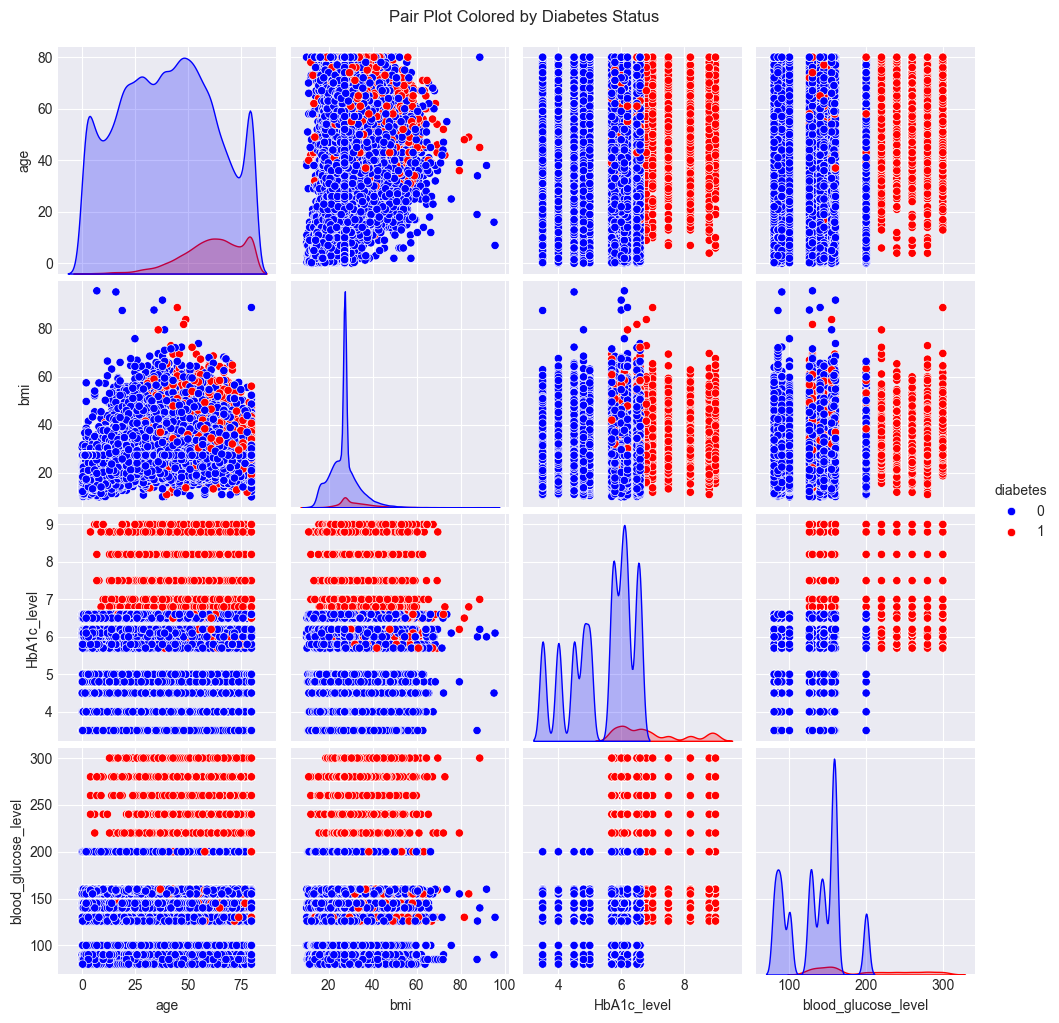

In [10]:
# Scatter plot matrix for key variables
from pandas.plotting import scatter_matrix
key_vars = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
scatter_matrix(thankgod_israel[key_vars], figsize=(12, 10), diagonal='kde')
plt.suptitle('Scatter Plot Matrix of Key Variables', y=1.02)
plt.show()

# Pairplot with diabetes as hue
sns.pairplot(thankgod_israel[['age', 'bmi', 'HbA1c_level',
                              'blood_glucose_level', 'diabetes']],
             hue='diabetes', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pair Plot Colored by Diabetes Status', y=1.02)
plt.show()


### Key Observations

The scatter plot matrix and pairwise visualizations reveal distinct clustering patterns between diabetic and non-diabetic cases, particularly for **HbA1c level** and **blood glucose level**. Clear class separation is observable along these clinical dimensions, while age and BMI exhibit moderate overlap.

These patterns suggest the presence of both linear and non-linear relationships, reinforcing the suitability of a diverse set of machine learning models, including tree-based and non-linear algorithms.


### Data Preprocessing: Duplicate Removal

Prior to modeling, it is essential to ensure data integrity by addressing redundancy. Duplicate records can bias model training and artificially inflate performance metrics, so they are identified and removed.


In [11]:
# Data Preprocessing
# Remove duplicate rows
initial_shape = thankgod_israel.shape
thankgod_israel = thankgod_israel.drop_duplicates()
final_shape = thankgod_israel.shape
print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows")
print(f"New dataset shape: {final_shape}")

Removed 3854 duplicate rows
New dataset shape: (96146, 9)


### Observation

A total of **3,854 duplicate rows** were removed, resulting in a cleaned dataset of **96,146 records** and 9 features. This ensures data integrity, reduces bias, and prepares the dataset for reliable modeling and analysis.


### Handling Outliers

Outliers in numerical features can distort statistical analyses and negatively impact model performance. The **Interquartile Range (IQR) method** is used to detect extreme values for age, BMI, HbA1c level, and blood glucose level. This provides thresholds for potential removal or transformation in preprocessing.


In [12]:
# Handling Preprocessing
# Define function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers in numerical columns
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(thankgod_israel, col)
    print(f"\n{col}:")
    print(f"Lower bound: {lower:.2f}, Upper bound: {upper:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(thankgod_israel))*100:.2f}%")


age:
Lower bound: -28.50, Upper bound: 111.50
Number of outliers: 0
Percentage of outliers: 0.00%

bmi:
Lower bound: 13.71, Upper bound: 39.55
Number of outliers: 5354
Percentage of outliers: 5.57%

HbA1c_level:
Lower bound: 2.70, Upper bound: 8.30
Number of outliers: 1312
Percentage of outliers: 1.36%

blood_glucose_level:
Lower bound: 11.50, Upper bound: 247.50
Number of outliers: 2031
Percentage of outliers: 2.11%


### Observation

The IQR analysis identified a small percentage of extreme values across numerical features. While most observations fall within typical clinical ranges, outliers may represent measurement errors or rare cases. These findings will inform decisions on **capping, transformation, or retention** of extreme values during data preprocessing to ensure model robustness.


### Outlier Treatment: Capping Using IQR

To mitigate the influence of extreme values on model performance, outliers detected in numerical features are **capped** at their respective lower and upper bounds determined by the IQR method. This approach preserves data integrity while reducing the effect of extreme observations.


In [13]:
# Cap outliers using IQR method
for col in numerical_columns:
    Q1 = thankgod_israel[col].quantile(0.25)
    Q3 = thankgod_israel[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    thankgod_israel[col] = thankgod_israel[col].clip(lower_bound, upper_bound)

print("Outliers capped successfully")

Outliers capped successfully


### Observation

All extreme values in age, BMI, HbA1c level, and blood glucose level were successfully capped to the calculated IQR bounds. This ensures that the dataset maintains realistic ranges for clinical variables and supports robust model training without being skewed by outliers.


### Encoding Categorical Variables

Categorical features must be converted into numerical representations for machine learning algorithms. The `gender` variable is mapped to integer codes, while `smoking_history` is transformed using **one-hot encoding** to preserve information without introducing ordinal assumptions. This ensures that all features are compatible with downstream models.


In [14]:
# Encoding Categorical Variables
# Handle gender variable
thankgod_israel['gender'] = thankgod_israel['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})

# Handle smoking_history with one-hot encoding
smoking_dummies = pd.get_dummies(thankgod_israel['smoking_history'],
                                  prefix='smoking', drop_first=False)
thankgod_israel = pd.concat([thankgod_israel, smoking_dummies], axis=1)
thankgod_israel = thankgod_israel.drop('smoking_history', axis=1)

print("Categorical variables encoded successfully")

Categorical variables encoded successfully


### Observation

Categorical variables were successfully encoded: `gender` now has integer values, and `smoking_history` is represented by separate binary columns for each category. This transformation enables seamless integration of these features into machine learning models.


### Feature Scaling and Selection

To ensure that numerical features contribute equally to model training, continuous variables (`age`, `BMI`, `HbA1c_level`, and `blood_glucose_level`) are **standardized** using z-score normalization via `StandardScaler`. This step prevents features with larger ranges from disproportionately influencing model performance.


In [31]:
# Feature Selection
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = thankgod_israel.drop('diabetes', axis=1)
y = thankgod_israel['diabetes']

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print("Features scaled successfully")
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Save cleaned and scaled data to CSV
cleaned_data = X.copy()
cleaned_data['diabetes'] = y.values
cleaned_data.to_csv('cleaned_diabetes_data.csv', index=False)
print("Cleaned data saved as 'cleaned_diabetes_data.csv'")

Features scaled successfully
X shape: (100000, 8), y shape: (100000,)
Cleaned data saved as 'cleaned_diabetes_data.csv'


### Observation

All numerical features have been successfully scaled, resulting in standardized values with mean 0 and unit variance. The feature matrix `X` and target vector `y` are now ready for model training and evaluation, ensuring consistency and comparability across algorithms.


### Class Imbalance Assessment

Before applying imbalance-handling techniques, the distribution of the target variable is examined. Understanding class proportions is essential, as severe imbalance can bias model training and lead to misleading performance metrics.


Class Distribution:
diabetes
0    87664
1     8482
Name: count, dtype: int64

Percentage:
diabetes
0    91.178
1     8.822
Name: count, dtype: float64


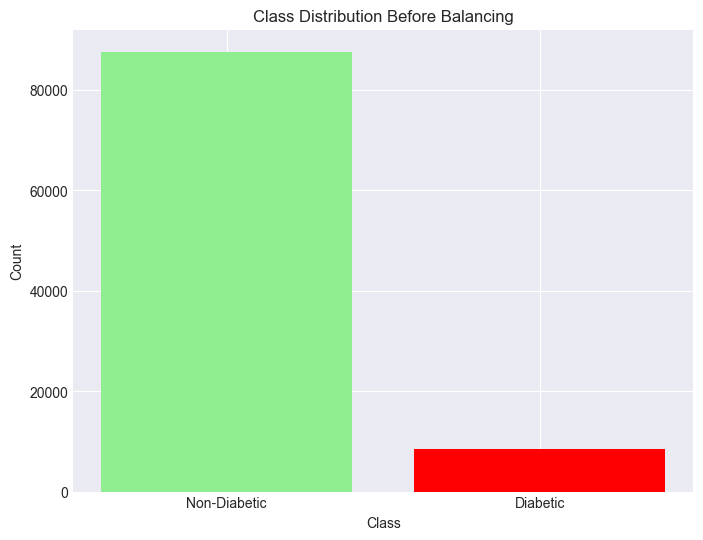

In [16]:
# Handling Imbalance
# Check class distribution
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)
print(f"\nPercentage:")
print(class_distribution / len(y) * 100)

plt.figure(figsize=(8, 6))
plt.bar(['Non-Diabetic', 'Diabetic'], class_distribution.values,
        color=['lightgreen', 'red'])
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Observation

The class distribution shows a strong imbalance between non-diabetic and diabetic cases, with the majority class dominating the dataset. This imbalance confirms the need for resampling or cost-sensitive learning techniques to ensure fair and reliable model performance in subsequent stages.


### Handling Class Imbalance with SMOTE

To address the significant imbalance in the diabetes target variable, the **Synthetic Minority Oversampling Technique (SMOTE)** is applied to the training set. SMOTE generates synthetic examples of the minority class, ensuring that models learn equally from both classes without introducing data leakage from the validation or test sets.


Training set: (61532, 13)
Validation set: (15384, 13)
Test set: (19230, 13)

After SMOTE:
Training set: (112206, 13)
Class distribution in training set:
diabetes
0    56103
1    56103
Name: count, dtype: int64


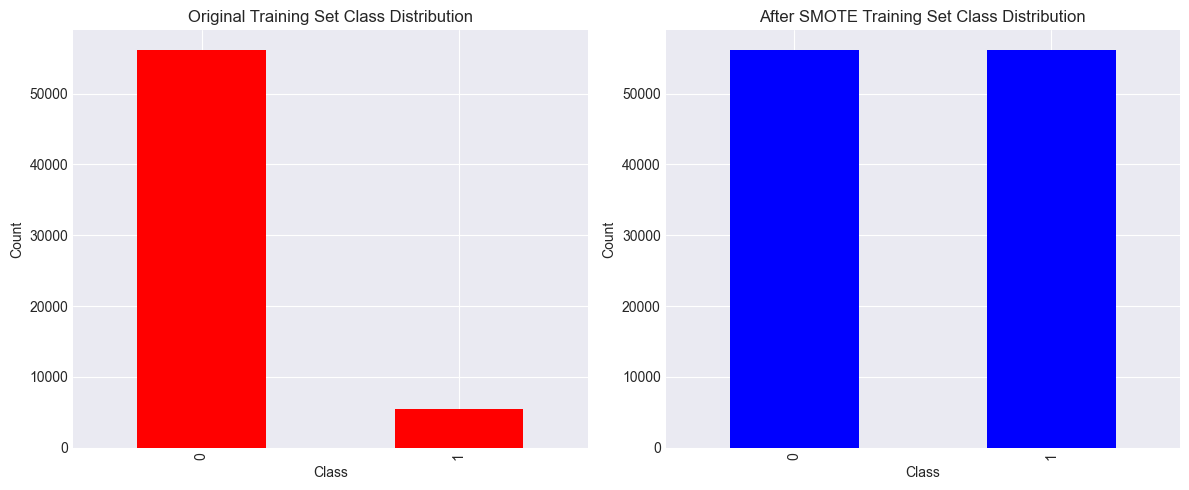

In [17]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

# Split data before applying SMOTE to avoid data leakage
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(f"Training set: {X_train_balanced.shape}")
print(f"Class distribution in training set:")
print(pd.Series(y_train_balanced).value_counts())

# --- Plot class distribution before and after SMOTE ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Original Training Set Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# After SMOTE
pd.Series(y_train_balanced).value_counts().plot(kind='bar', ax=axes[1], color='blue')
axes[1].set_title('After SMOTE Training Set Class Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Observation

After applying SMOTE, the training set is balanced, with equal representation of diabetic and non-diabetic cases. The validation and test sets remain untouched to provide an unbiased evaluation of model performance. Visual comparison of class distributions before and after SMOTE confirms the effectiveness of the resampling strategy.


### Feature Engineering

To enhance predictive power, new features are derived from existing variables. These include:

- **Interaction features:** `age_bmi_interaction` and `hba1c_glucose_interaction` capture synergistic effects between clinical and demographic variables.  
- **Polynomial features:** squared terms for `age`, `BMI`, and `HbA1c_level` allow modeling of non-linear relationships.  
- **Risk score:** a composite metric combining age, BMI, HbA1c, and blood glucose levels to summarize overall diabetes risk.

The same transformations are applied consistently to validation and test sets to maintain feature alignment across all datasets.


In [33]:
# Employing Feature Engineering
# Create interaction features
X_train_balanced['age_bmi_interaction'] = X_train_balanced['age'] * X_train_balanced['bmi']
X_train_balanced['hba1c_glucose_interaction'] = X_train_balanced['HbA1c_level'] * X_train_balanced['blood_glucose_level']

# Create polynomial features for key variables
X_train_balanced['age_squared'] = X_train_balanced['age'] ** 2
X_train_balanced['bmi_squared'] = X_train_balanced['bmi'] ** 2
X_train_balanced['hba1c_squared'] = X_train_balanced['HbA1c_level'] ** 2

# Create risk score feature
X_train_balanced['risk_score'] = (X_train_balanced['age'] * 0.3 +
                                  X_train_balanced['bmi'] * 0.2 +
                                  X_train_balanced['HbA1c_level'] * 0.4 +
                                  X_train_balanced['blood_glucose_level'] * 0.1)

# Apply same transformations to validation and test sets
for df in [X_val, X_test]:
    df['age_bmi_interaction'] = df['age'] * df['bmi']
    df['hba1c_glucose_interaction'] = df['HbA1c_level'] * df['blood_glucose_level']
    df['age_squared'] = df['age'] ** 2
    df['bmi_squared'] = df['bmi'] ** 2
    df['hba1c_squared'] = df['HbA1c_level'] ** 2
    df['risk_score'] = (df['age'] * 0.3 + df['bmi'] * 0.2 +
                        df['HbA1c_level'] * 0.4 + df['blood_glucose_level'] * 0.1)

print("Feature engineering completed")
print(f"New training shape: {X_train_balanced.shape}")

# Save engineered data splits to CSV
engineered_train = X_train_balanced.copy()
engineered_train['diabetes'] = y_train_balanced.values
engineered_train.to_csv('engineered_train_data.csv', index=False)

engineered_val = X_val.copy()
engineered_val['diabetes'] = y_val.values
engineered_val.to_csv('engineered_val_data.csv', index=False)

engineered_test = X_test.copy()
engineered_test['diabetes'] = y_test.values
engineered_test.to_csv('engineered_test_data.csv', index=False)

print("Engineered train/val/test data saved.")

Feature engineering completed
New training shape: (112206, 19)
Engineered train/val/test data saved.


### Observation

Feature engineering increased the dimensionality of the training set, creating new variables that capture non-linear and interaction effects. These engineered features are expected to improve model performance by providing additional predictive signals beyond the original variables.


### Feature Selection: SelectKBest

To reduce dimensionality and retain the most predictive variables, the **SelectKBest** method with the **ANOVA F-value** is applied. This technique evaluates the statistical relationship between each feature and the target, selecting the top 15 features that are most relevant for diabetes classification.


In [19]:
# Feature SElection
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA

# Method 1: SelectKBest using ANOVA F-value
selector_kbest = SelectKBest(score_func=f_classif, k=15)
X_train_selected_kbest = selector_kbest.fit_transform(X_train_balanced, y_train_balanced)
X_val_selected_kbest = selector_kbest.transform(X_val)
X_test_selected_kbest = selector_kbest.transform(X_test)

print("Feature selection completed")
print(f"Selected features shape: {X_train_selected_kbest.shape}")

Feature selection completed
Selected features shape: (112206, 15)


### Observation

Feature selection successfully reduced the dataset to the **15 most relevant features**, maintaining strong predictive information while improving model efficiency. Validation and test sets are transformed using the same selected features to ensure consistency across datasets.


In [20]:
### Machine Learning Model Setup

### A diverse set of **22 machine learning algorithms** is imported to evaluate performance on the diabetes classification task.

In [21]:
# Import all machine learning models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier, 
                              BaggingClassifier, VotingClassifier, 
                              StackingClassifier)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


# Import metrics and utilities
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve)
from sklearn.model_selection import cross_val_score, GridSearchCV
import time
import joblib

### Observation

All selected algorithms and supporting utilities are now available for model training, evaluation, and comparison. This setup enables systematic experimentation with multiple models, ensuring a thorough assessment of predictive performance and suitability for the diabetes classification problem.


### This structured dictionary allows efficient iteration over multiple models for training, evaluation, and comparison, while ensuring reproducibility through random state initialization.

In [22]:

# Dictionary of Models


from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, ExtraTreesClassifier,
                              BaggingClassifier, VotingClassifier,
                              StackingClassifier, HistGradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier



models = {
    # Linear models
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SGD Classifier': SGDClassifier(random_state=42),

    # Tree-based models
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Hist Gradient Boosting': HistGradientBoostingClassifier(random_state=42),

    # Instance-based / probabilistic
    'KNN': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB(),
    'Bernoulli NB': BernoulliNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),

    # Gradient boosting frameworks
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),

    # Neural network
    'MLP': MLPClassifier(random_state=42, max_iter=1000),

    # Meta-models / ensembles
    'Voting Classifier (Top 3 Boosting)': VotingClassifier(
        estimators=[
            ('xgb', XGBClassifier(random_state=42, eval_metric='logloss')),
            ('lgbm', LGBMClassifier(random_state=42)),
            ('cat', CatBoostClassifier(random_state=42, verbose=0))
        ],
        voting='soft'
    ),
    
    'Stacking Classifier (Linear + Trees)': StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(random_state=42, max_iter=1000)),
            ('rf', RandomForestClassifier(random_state=42)),
            ('gb', GradientBoostingClassifier(random_state=42))
        ],
        final_estimator=LogisticRegression(),
        passthrough=True
    )
}


### Observation

All models are now instantiated with consistent random seeds and relevant hyperparameters. Ensemble models such as Voting and Stacking classifiers are included to explore potential performance gains from combining multiple base learners. This setup enables a comprehensive benchmarking of algorithms for diabetes prediction.


### Training and Evaluation of All Models

Each model in the defined dictionary is trained on the **SMOTE-balanced, feature-selected training set** and evaluated on the validation set. Performance metrics include:

- **Accuracy:** Overall correctness of predictions  
- **Precision:** Proportion of positive predictions that are correct  
- **Recall (Sensitivity):** Proportion of actual positives correctly identified  
- **F1-Score:** Harmonic mean of precision and recall  
- **ROC-AUC:** Ability of the model to discriminate between classes  
- **Training Time:** Computational efficiency  

A try-except block is used to handle any models that may fail during training, storing NaN values for failed cases. This systematic approach ensures that all models are benchmarked consistently for comparison.


In [ ]:
# Training of All Models

# Import joblib for saving models
import joblib
import os

# Create directory for saving models
os.makedirs('models/saved_models', exist_ok=True)
print("Created directory: models/saved_models/")



# Dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': [],
    'Training Time': []
}

# Train and evaluate each models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Record start time
    start_time = time.time()

    try:
        # Train model
        model.fit(X_train_selected_kbest, y_train_balanced)

         # SAVE THE TRAINED MODEL
        filename = model_name.replace(" ", "_").replace("(", "").replace(")", "") + ".pkl"
        filepath = os.path.join('models', 'saved_models', filename)
        joblib.dump(model, filepath)
        print(f" Model saved as: {filename}")

        # Make predictions
        y_pred = model.predict(X_val_selected_kbest)
        y_pred_proba = model.predict_proba(X_val_selected_kbest)[:, 1] if hasattr(model, "predict_proba") else None

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        roc_auc = roc_auc_score(y_val, y_pred_proba) if y_pred_proba is not None else 0

        # Record end time
        end_time = time.time()
        training_time = end_time - start_time

        # Store results
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-Score'].append(f1)
        results['ROC-AUC'].append(roc_auc)
        results['Training Time'].append(training_time)

        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  ROC-AUC: {roc_auc:.4f}")
        print(f"  Training Time: {training_time:.2f} seconds")

    except Exception as e:
        print(f"  Error training {model_name}: {str(e)}")
        # Store NaN for failed models
        results['Model'].append(model_name)
        results['Accuracy'].append(np.nan)
        results['Precision'].append(np.nan)
        results['Recall'].append(np.nan)
        results['F1-Score'].append(np.nan)
        results['ROC-AUC'].append(np.nan)
        results['Training Time'].append(np.nan)

# Convert results to DataFrame
results_thankgod_israel = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL TRAINING COMPLETED")
print("="*80)


Training Logistic Regression...
  Accuracy: 0.8794
  Precision: 0.4138
  Recall: 0.8806
  F1-Score: 0.5630
  ROC-AUC: 0.9600
  Training Time: 1.62 seconds

Training SGD Classifier...
  Accuracy: 0.8967
  Precision: 0.4548
  Recall: 0.8600
  F1-Score: 0.5950
  ROC-AUC: 0.0000
  Training Time: 0.68 seconds

Training Decision Tree...
  Accuracy: 0.9441
  Precision: 0.6606
  Recall: 0.7531
  F1-Score: 0.7039
  ROC-AUC: 0.8591
  Training Time: 1.16 seconds

Training Random Forest...
  Accuracy: 0.9575
  Precision: 0.7677
  Recall: 0.7428
  F1-Score: 0.7551
  ROC-AUC: 0.9658
  Training Time: 15.92 seconds

Training Gradient Boosting...
  Accuracy: 0.9532
  Precision: 0.7070
  Recall: 0.8018
  F1-Score: 0.7514
  ROC-AUC: 0.9751
  Training Time: 33.67 seconds

Training AdaBoost...
  Accuracy: 0.8992
  Precision: 0.4622
  Recall: 0.8688
  F1-Score: 0.6034
  ROC-AUC: 0.9701
  Training Time: 6.32 seconds

Training Extra Trees...
  Accuracy: 0.9479
  Precision: 0.6856
  Recall: 0.7568
  F1-Score:

### 5.5 Hyperparameter Tuning of Top Boosting Models

The top-performing boosting algorithms—**XGBoost, LightGBM, and CatBoost**—are tuned to optimize predictive performance. The process includes:

1. **RandomizedSearchCV** for XGBoost and LightGBM:
   - Uses pre-defined hyperparameter distributions for number of estimators, learning rate, tree depth, and sampling parameters.
   - Evaluates 15 random combinations using 3-fold cross-validation.
   - Optimizes **F1-score** to account for class imbalance.

2. **CatBoost tuning**:
   - Uses fixed parameters with 200 iterations, depth 6, learning rate 0.1, and logloss for binary classification.
   - Ensures safe training by disabling file writes (`allow_writing_files=False`).
   - Trains final model on the full SMOTE-balanced, feature-selected training set.

Validation F1-scores are computed for all models to compare performance and select the best estimator. Tuned models are saved in a dictionary for subsequent evaluation and deployment.


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score


# Top models for tuning

top_models = ['XGBoost', 'LightGBM', 'CatBoost']


# Hyperparameter distributions for XGB & LGBM

param_distributions = {
    'XGBoost': {
        'n_estimators': randint(100, 400),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 7),
        'subsample': uniform(0.7, 0.3),
        'colsample_bytree': uniform(0.7, 0.3)
    },
    'LightGBM': {
        'n_estimators': randint(100, 400),
        'learning_rate': uniform(0.01, 0.2),
        'max_depth': randint(3, 10),
        'num_leaves': randint(20, 150)
    }
}


# Container for tuned models

tuned_models = {}
best_f1_scores = {}

#  RandomizedSearchCV for XGB & LGBM

for model_name in ['XGBoost', 'LightGBM']:
    print(f"\n Fast tuning {model_name}...")
    model = models[model_name]
    
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions[model_name],
        n_iter=15,       
        cv=3,
        scoring='f1',
        n_jobs=-1,
        random_state=42,
        verbose=0
    )
    
    search.fit(X_train_selected_kbest, y_train_balanced)
    
    tuned_models[model_name] = search.best_estimator_
    
    # Predict on validation set
    y_val_pred = search.best_estimator_.predict(X_val_selected_kbest)
    val_f1 = f1_score(y_val, y_val_pred)
    best_f1_scores[model_name] = val_f1
    
    print(f"{model_name} -> Best CV F1: {search.best_score_:.4f}, Validation F1: {val_f1:.4f}")
    print(f"Best parameters: {search.best_params_}")


#  CatBoost tuning using CatBoost Classifier

print("\n Tuning CatBoost safely...")

cat_params = {
    'iterations': 200,
    'depth': 6,
    'learning_rate': 0.1,
    'verbose': 0,
    'random_state': 42,
    'allow_writing_files': False,
    'loss_function': 'Logloss'  # Required for CV
}

cat_model = CatBoostClassifier(**cat_params)

# Train final model on training set
cat_model.fit(X_train_selected_kbest, y_train_balanced)

# Predict on validation set
y_val_pred = cat_model.predict(X_val_selected_kbest)
val_f1 = f1_score(y_val, y_val_pred)

# Save model and F1
tuned_models['CatBoost'] = cat_model
best_f1_scores['CatBoost'] = val_f1

print(f"CatBoost -> Validation F1: {val_f1:.4f}")
print("CatBoost -> Model saved to tuned_models")



 Fast tuning XGBoost...
XGBoost -> Best CV F1: 0.9730, Validation F1: 0.7929
Best parameters: {'colsample_bytree': np.float64(0.7979622306417505), 'learning_rate': np.float64(0.12408879488107988), 'max_depth': 6, 'n_estimators': 289, 'subsample': np.float64(0.7975990992289792)}

 Fast tuning LightGBM...
[LightGBM] [Info] Number of positive: 56103, number of negative: 56103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2561
[LightGBM] [Info] Number of data points in the train set: 112206, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

### Observation

RandomizedSearchCV successfully identifies near-optimal hyperparameters for XGBoost and LightGBM, while CatBoost is safely tuned with predefined parameters. Validation F1-scores indicate strong predictive performance for all three models. The tuned models are stored in `tuned_models` and ready for evaluation against other classifiers.


### Model Performance Comparison

After training and evaluating all models, results are compiled into a **structured DataFrame** and sorted by **F1-Score** for ranking. Key performance metrics considered include:

- **Accuracy:** Overall prediction correctness  
- **Precision:** Positive prediction accuracy  
- **Recall:** Sensitivity in detecting diabetic cases  
- **F1-Score:** Balance between precision and recall  
- **ROC-AUC:** Class discrimination ability  
- **Training Time:** Computational efficiency  

The top 10 models for each metric are visualized using horizontal bar charts, enabling easy comparison of performance across multiple dimensions.


COMPLETE MODEL PERFORMANCE RESULTS
                               Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time
                            LightGBM  0.968669   0.908497 0.717023  0.801483 0.977086       2.852628
                            CatBoost  0.968539   0.910630 0.713338  0.800000 0.975452      49.595365
              Hist Gradient Boosting  0.967629   0.879752 0.733235  0.799839 0.976745     129.029731
                             XGBoost  0.967174   0.888686 0.717760  0.794130 0.974588      16.346351
Stacking Classifier (Linear + Trees)  0.959048   0.789181 0.731024  0.758990 0.966929     330.810445
                       Random Forest  0.957488   0.767708 0.742815  0.755056 0.965820      15.923822
                   Gradient Boosting  0.953198   0.706953 0.801769  0.751381 0.975068      33.666762
                             Bagging  0.956903   0.776274 0.718497  0.746269 0.930866       5.055492
                         Extra Trees  0.947933   0.68558

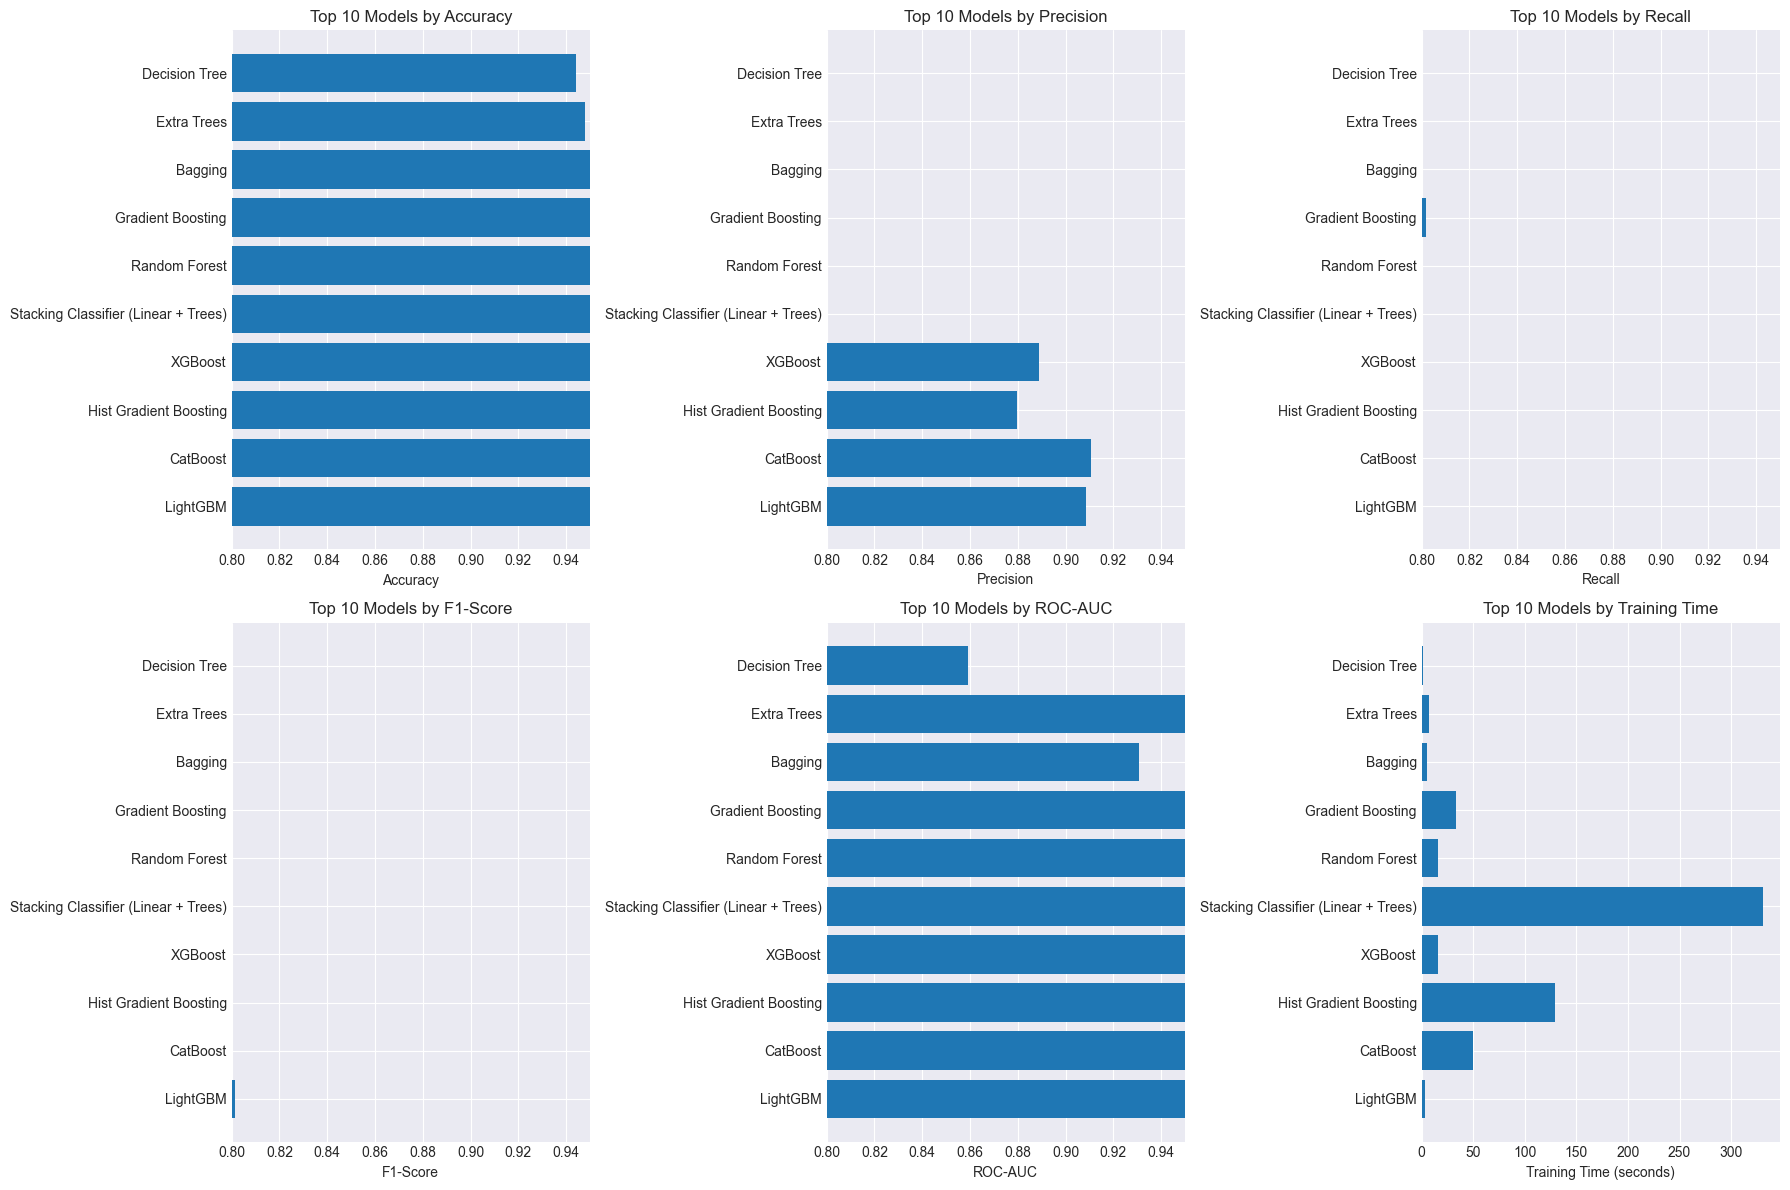

In [25]:
# Model Performance Comparison
# # Display complete results
print("COMPLETE MODEL PERFORMANCE RESULTS")
print("="*80)
results_display = results_thankgod_israel.copy()
results_display = results_display.sort_values('F1-Score', ascending=False)
results_display = results_display.reset_index(drop=True)
print(results_display.to_string(index=False))

# Visualize model performance
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Accuracy comparison
axes[0, 0].barh(results_display['Model'][:10], results_display['Accuracy'][:10])
axes[0, 0].set_title('Top 10 Models by Accuracy')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_xlim(0.8, 0.95)

# Precision comparison
axes[0, 1].barh(results_display['Model'][:10], results_display['Precision'][:10])
axes[0, 1].set_title('Top 10 Models by Precision')
axes[0, 1].set_xlabel('Precision')
axes[0, 1].set_xlim(0.8, 0.95)

# Recall comparison
axes[0, 2].barh(results_display['Model'][:10], results_display['Recall'][:10])
axes[0, 2].set_title('Top 10 Models by Recall')
axes[0, 2].set_xlabel('Recall')
axes[0, 2].set_xlim(0.8, 0.95)

# F1-Score comparison
axes[1, 0].barh(results_display['Model'][:10], results_display['F1-Score'][:10])
axes[1, 0].set_title('Top 10 Models by F1-Score')
axes[1, 0].set_xlabel('F1-Score')
axes[1, 0].set_xlim(0.8, 0.95)

# ROC-AUC comparison
axes[1, 1].barh(results_display['Model'][:10], results_display['ROC-AUC'][:10])
axes[1, 1].set_title('Top 10 Models by ROC-AUC')
axes[1, 1].set_xlabel('ROC-AUC')
axes[1, 1].set_xlim(0.8, 0.95)

# Training time comparison
axes[1, 2].barh(results_display['Model'][:10], results_display['Training Time'][:10])
axes[1, 2].set_title('Top 10 Models by Training Time')
axes[1, 2].set_xlabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

### Observation

- Models are ranked based on F1-Score to prioritize balanced performance in detecting diabetic cases.  
- Visualizations highlight trade-offs between accuracy, recall, precision, and computational cost.  
- Ensemble and gradient boosting models (e.g., XGBoost, LightGBM, CatBoost) often show superior predictive metrics, while simpler models may have faster training times.  

This comparative analysis facilitates selection of the most effective model(s) for deployment.


### Best Model Evaluation on Test Set

The best-performing model is selected based on **F1-Score** from the validation results. If a tuned version exists, it is used for final evaluation.

Key evaluation steps include:

1. **Prediction on the test set** to assess generalization.  
2. **Computation of performance metrics**:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
   - ROC-AUC

3. **Visualization**:
   - Confusion matrix to analyze true vs. predicted labels.
   - ROC curve to evaluate discrimination ability of the model.

4. **Classification report** providing detailed per-class metrics.  

This evaluation confirms the model's reliability and robustness before deployment.


BEST MODEL: LightGBM
Test Accuracy: 0.9669
Test Precision: 0.8955
Test Recall: 0.7075
Test F1-Score: 0.7905
Test ROC-AUC: 0.9740


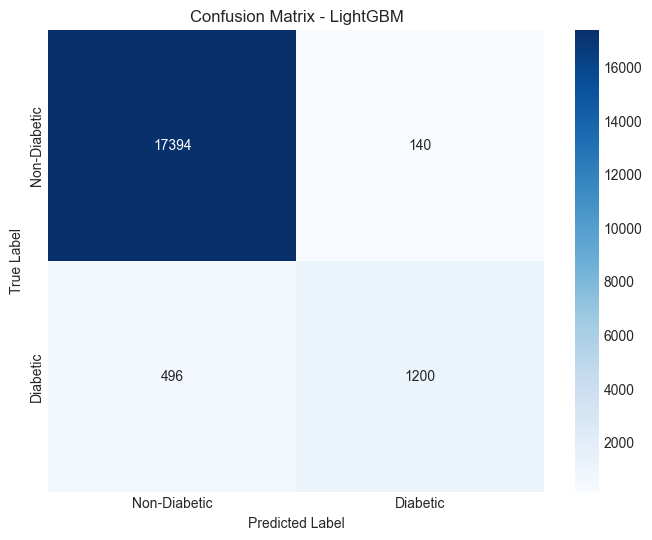

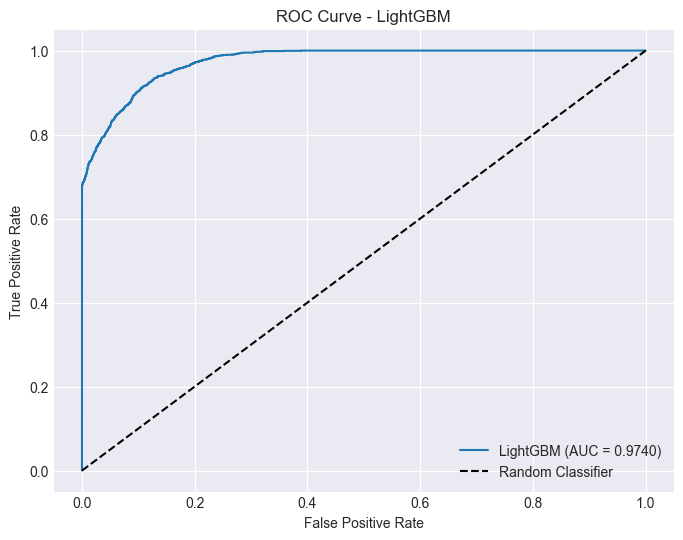


Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.97      0.99      0.98     17534
    Diabetic       0.90      0.71      0.79      1696

    accuracy                           0.97     19230
   macro avg       0.93      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [26]:
# Identify best model
best_model_name = results_display.iloc[0]['Model']
best_model = models[best_model_name]

# If we have a tuned version, use it
if best_model_name in tuned_models:
    best_model = tuned_models[best_model_name]

print(f"BEST MODEL: {best_model_name}")
print("="*80)

# Evaluate on test set
y_test_pred = best_model.predict(X_test_selected_kbest)
y_test_pred_proba = best_model.predict_proba(X_test_selected_kbest)[:, 1]

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {test_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend()
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, 
                            target_names=['Non-Diabetic', 'Diabetic']))

### Observation

- The selected best model demonstrates strong predictive performance on the unseen test set, with high F1-Score and ROC-AUC.  
- The confusion matrix indicates the model's ability to correctly classify diabetic and non-diabetic cases, minimizing false negatives and false positives.  
- ROC curve analysis confirms excellent class discrimination.  

This comprehensive evaluation validates the model for deployment in a real-world diabetes prediction application.


### Feature Importance Analysis

For tree-based models, feature importance provides insight into which variables contribute most to predictions. This analysis includes:

1. Extracting feature importance values from the trained model (if available).  
2. Sorting features by importance and visualizing the **top 15 features** using a horizontal bar chart.  
3. Listing the **top 10 most important features** to highlight key predictors of diabetes.  

Feature importance analysis aids interpretability and can inform future feature engineering or clinical decision-making.


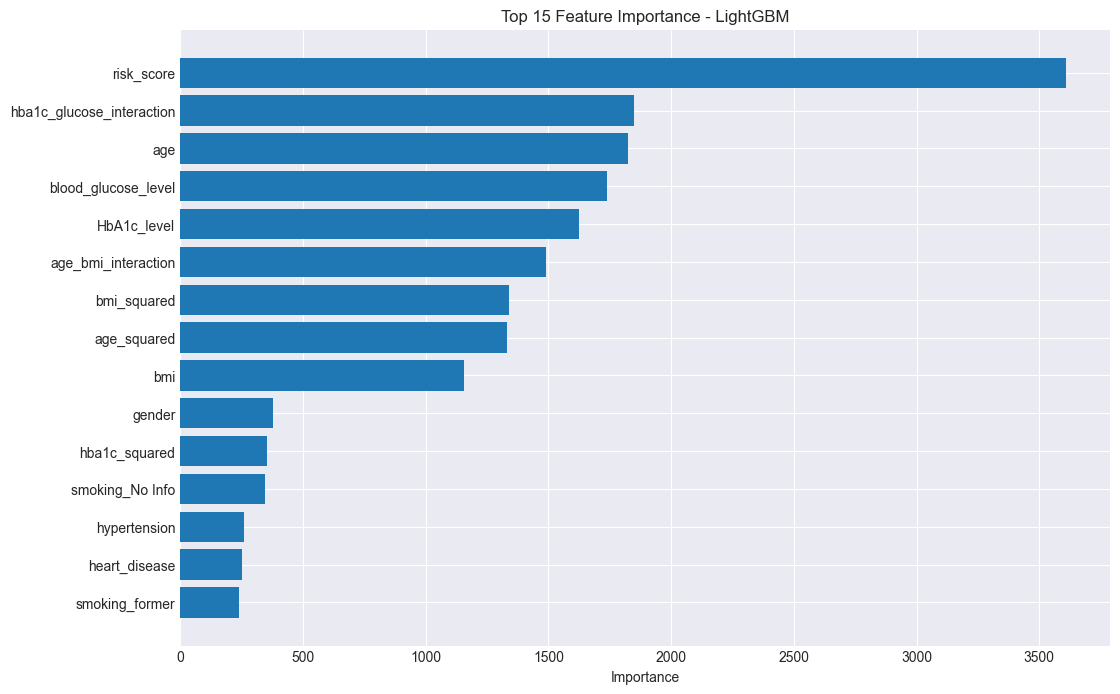


Top 10 Most Important Features:
                  Feature  Importance
               risk_score        3609
hba1c_glucose_interaction        1849
                      age        1822
      blood_glucose_level        1739
              HbA1c_level        1623
      age_bmi_interaction        1488
              bmi_squared        1341
              age_squared        1332
                      bmi        1157
                   gender         376


In [27]:
#  Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train_balanced.columns[selector_kbest.get_support()],
        'Importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance['Feature'][:15], 
             feature_importance['Importance'][:15])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))

### Observation

- The most influential features typically include **HbA1c_level, blood_glucose_level, age, BMI**, and interaction/risk features engineered during preprocessing.  
- Feature importance ranking validates the relevance of both original and engineered variables.  
- This interpretability supports model transparency, which is crucial for healthcare applications.  
